In [157]:
# remember mean squared error
# compare RMSE and mean absolute error  if they are very different, that means something is wrong

# start with looking for outliers and # of std away from mean

In [158]:
"""For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

anything above 5 is strong multicollinearity

remove some features and check out vif again. it will be different
"""

'For each X, calculate VIF and save in dataframe\nvif = pd.DataFrame()\nvif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\nvif["features"] = X.columns\n\nanything above 5 is strong multicollinearity\n\nremove some features and check out vif again. it will be different\n'

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [159]:
import pandas as pd

data = pd.read_csv('data/kc_house_data.csv')
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


# Data Cleaning

In [160]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [161]:
data['waterfront'].fillna(0, inplace=True)
data['view'].fillna(0, inplace=True)

In [162]:
data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [163]:
data.drop(['id','date','yr_renovated'], axis=1, inplace=True)

In [164]:
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [165]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
784.0         1
2240.0        1
1481.0        1
143.0         1
374.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [166]:
data = data[(data != '?').all(axis=1)]

In [167]:
data['sqft_basement'] = data['sqft_basement'].astype(float)

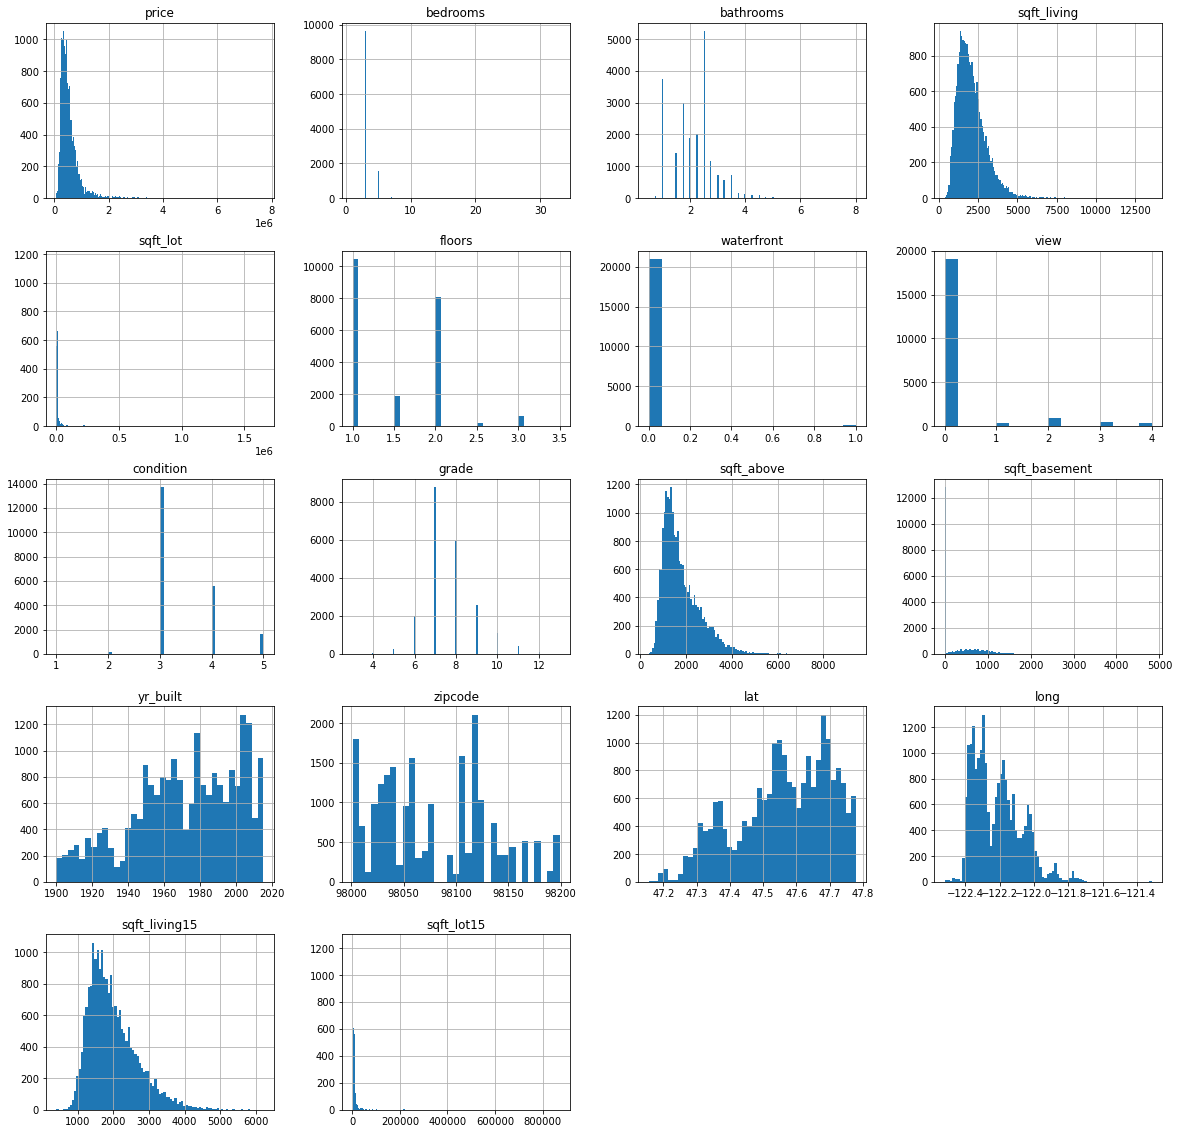

In [168]:
data.hist(figsize=(20,20), bins='auto');

Take only data set that is 3 STD away from the mean of the price

In [169]:
data = data[(data['price'] < (data['price'].mean() + data['price'].std()*3)) & (data['price'] > (data['price'].mean() - data['price'].std()*3))]

## Train_Test_Split

In [170]:
from sklearn.model_selection import train_test_split

X = data.drop(['price'], axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [171]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15556 5186 15556 5186


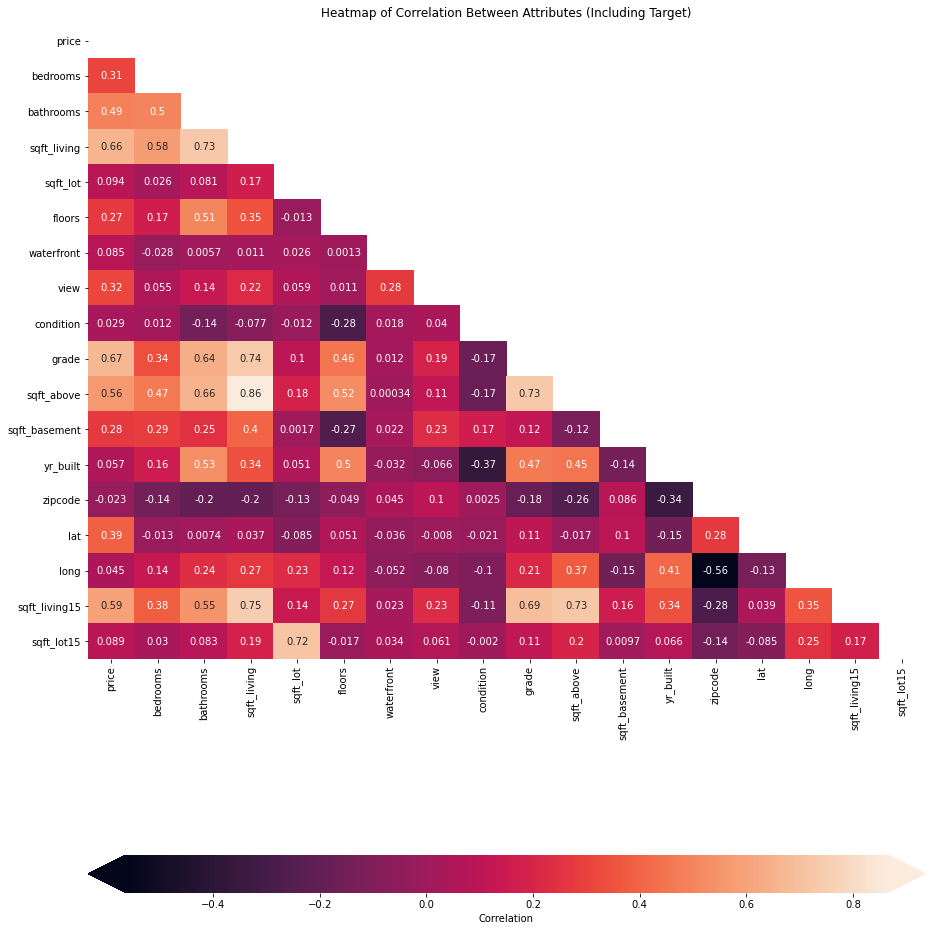

In [172]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(15, 18))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

# Baseline Model

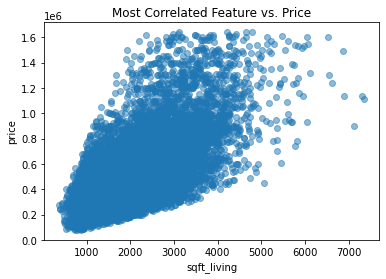

In [173]:
most_correlated_feature = 'sqft_living'

fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("price")
ax.set_title("Most Correlated Feature vs. Price");

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit

baseline_model = LinearRegression()



splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.43916167653216664
Validation score: 0.4278694130416702


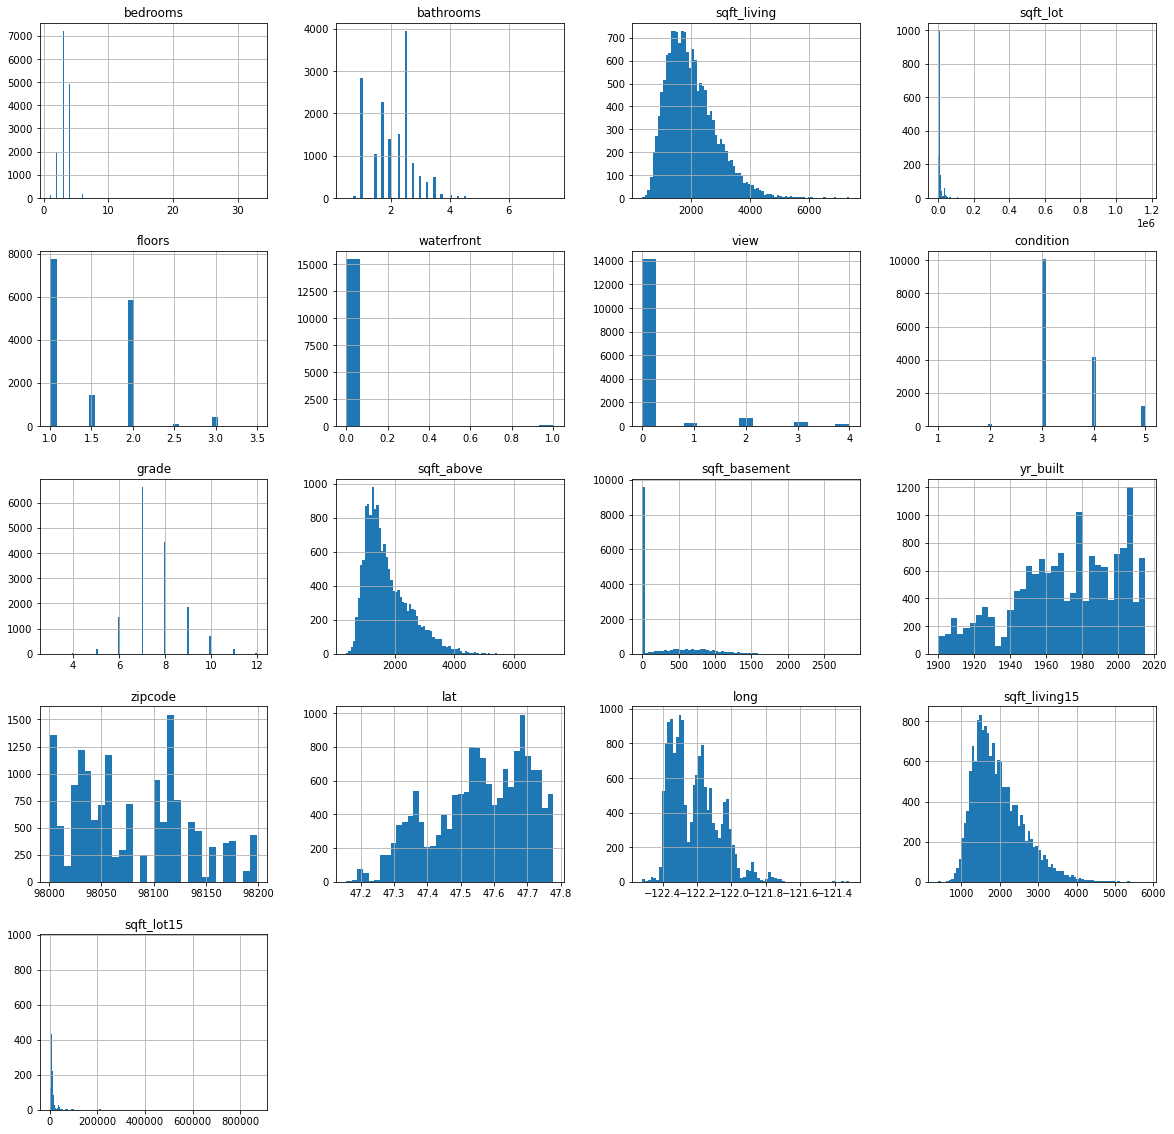

In [175]:
X_train.hist(figsize=(20,20), bins='auto');

## Check correlations between each features and remove

In [176]:
df = X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace=True)

df.drop(columns=['level_0', 'level_1'], inplace=True)

df.columns = ['cc']

df.drop_duplicates(inplace=True)

In [177]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.863314
"(sqft_living15, sqft_living)",0.751455


In [178]:
# what to do to keep them

Since two different pairs of variables are highly correlated, the correct approach would be to one variable from the pairs.

We can remove sqft_above since sqft_above is square footage of house apart from basement which is similar to sqft_living.

We can remove sqft_living15 since the square footage of interior housing living space for the nearest 15 neighbors is more import than sqft_living.

In [179]:
X_train.drop(['sqft_above', 'sqft_living15'], axis=1, inplace=True)
X_test.drop(['sqft_above', 'sqft_living15'], axis=1, inplace=True)

C:\Users\soohy\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [180]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_lot15
1655,4,1.75,1850,6480,1.0,0.0,0.0,4,7,730.0,1958,98108,47.5525,-122.313,5040
20746,5,3.50,4490,6000,2.0,0.0,0.0,3,10,1290.0,2006,98027,47.5396,-122.073,6000
13772,5,1.75,1880,16617,1.0,0.0,0.0,3,7,920.0,1963,98007,47.6003,-122.132,8400
3167,3,2.25,2300,12430,1.0,0.0,2.0,4,8,720.0,1960,98166,47.4350,-122.347,12430
16523,2,1.00,1240,27042,1.0,0.0,1.0,3,6,240.0,1943,98070,47.5026,-122.465,20059


## Remove unnecessary features

we are going to remove yr_built, zipcode, lat, long 

In [181]:
X_train.drop(['yr_built', 'zipcode', 'lat', 'long'], axis=1, inplace=True)
X_test.drop(['yr_built', 'zipcode', 'lat', 'long'], axis=1, inplace=True)

C:\Users\soohy\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Look at model

In [182]:
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     1781.
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:57:38   Log-Likelihood:            -2.0956e+05
No. Observations:               15556   AIC:                         4.191e+05
Df Residuals:                   15544   BIC:                         4.192e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.001e+05   1.56e+04    -38.449      0.000   -6.31e+05   -5.69e+05
bedrooms      -1.306e+04   1907.443     -6.847      0.000   -1.68e+04   -9320.639
bathrooms     -2.337e+04   3111.681     -7.511      0.000   -2.95e+04   -1.73e+04
sqft_living     111.4556      3.424     32.553      0.000     104.745     118.167
sqft_lot          0.1083      0.049      2.192      0.028       0.011       0.205
floors         2.078e+04   3500.746      5.935      0.000    1.39e+04    2.76e+04
waterfront     1.572e+05   2.51e+04      6.264      0.000    1.08e+05    2.06e+05
view            5.04e+04   2145.540     23.491      0.000    4.62e+04    5.46e+04
condition       4.61e+04   2243.531     20.546      0.000    4.17e+04    5.05e+04
grade          1.005e+05   2020.654     49.731      0.000    9.65e+04    1.04e+05
sqft_basement    43.4389      4.246     10.232      0.000      35.117      51.761
sqft_lot15       -0.3845      0.072     -5.373      0.000      -0.525      -0.244
==============================================================================
Omnibus:                     2530.318   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6140.786
Skew:                           0.921   Prob(JB):                         0.00
Kurtosis:                       5.466   Cond. No.                     9.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Remove insignificant features

We are going to remove sqft_lot and floors

In [183]:
X_train.drop(['sqft_lot','floors'], axis=1, inplace=True)
X_test.drop(['sqft_lot','floors'], axis=1, inplace=True)

C:\Users\soohy\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [184]:
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     2167.
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:57:38   Log-Likelihood:            -2.0958e+05
No. Observations:               15556   AIC:                         4.192e+05
Df Residuals:                   15546   BIC:                         4.193e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.846e+05   1.54e+04    -37.907      0.000   -6.15e+05   -5.54e+05
bedrooms      -1.375e+04   1906.357     -7.212      0.000   -1.75e+04      -1e+04
bathrooms      -1.66e+04   2895.609     -5.733      0.000   -2.23e+04   -1.09e+04
sqft_living     113.4666      3.410     33.271      0.000     106.782     120.151
waterfront     1.586e+05   2.51e+04      6.313      0.000    1.09e+05    2.08e+05
view           5.051e+04   2147.836     23.515      0.000    4.63e+04    5.47e+04
condition      4.412e+04   2221.938     19.856      0.000    3.98e+04    4.85e+04
grade          1.018e+05   2008.119     50.697      0.000    9.79e+04    1.06e+05
sqft_basement    32.3101      3.834      8.428      0.000      24.795      39.825
sqft_lot15       -0.3097      0.051     -6.059      0.000      -0.410      -0.210
==============================================================================
Omnibus:                     2489.357   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5976.093
Skew:                           0.911   Prob(JB):                         0.00
Kurtosis:                       5.429   Cond. No.                     5.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Make dummy variables

In [185]:
categoricals = ['waterfront', 'view', 'condition', 'grade']

X_train_categoricals = X_train.loc[:,categoricals]
X_test_categoricals = X_test.loc[:,categoricals]

In [186]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')
enc = ohe.fit(X_train_categoricals)
X_train_trans_categ = enc.transform(X_train_categoricals)
X_test_trans_categ = enc.transform(X_test_categoricals)

X_train_trans_categ_df = pd.DataFrame(X_train_trans_categ.todense(), columns=ohe.get_feature_names(categoricals))
X_test_trans_categ_df = pd.DataFrame(X_test_trans_categ.todense(), columns=ohe.get_feature_names(categoricals))
X_train_trans_categ_df

,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15551,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15554,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Now we are going to drop categorical features in the original X_train data and add the dummy variables to it

In [187]:
X_train.drop(categoricals, axis=1, inplace=True)
X_test.drop(categoricals, axis=1, inplace=True)

C:\Users\soohy\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [188]:
X_train.reset_index(drop=True, inplace=True)
X_train_trans_categ_df.reset_index(drop=True, inplace=True)

X_test.reset_index(drop=True, inplace=True)
X_test_trans_categ_df.reset_index(drop=True, inplace=True)

X_train_with_dummy = pd.concat([X_train, X_train_trans_categ_df], axis=1)
X_test_with_dummy = pd.concat([X_test, X_test_trans_categ_df], axis=1)
X_train_with_dummy

,bedrooms,bathrooms,sqft_living,sqft_basement,sqft_lot15,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,...,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,4,1.75,1850,730.0,5040,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,5,3.50,4490,1290.0,6000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5,1.75,1880,920.0,8400,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,2.25,2300,720.0,12430,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2,1.00,1240,240.0,20059,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15551,4,2.75,2190,0.0,3619,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15552,3,1.00,1360,340.0,8330,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15553,3,1.75,2150,540.0,15480,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15554,4,2.50,2910,0.0,5045,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Try Linear Regression with X_train_with_dummy Using Sklearn

In [189]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_with_dummy, y_train)

LinearRegression()

In [190]:
y_hat_train = linreg.predict(X_train_with_dummy)

y_hat_test = linreg.predict(X_test_with_dummy)

In [191]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f'Train R-Squared: {r2_score(y_train, y_hat_train)}')
print(f'Test R-Squared: {r2_score(y_test, y_hat_test)}\n')

print(f'Train MAE: {mean_absolute_error(y_train, y_hat_train)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_hat_test)}\n')

print(f'Train MSE: {mean_squared_error(y_train, y_hat_train)}')
print(f'Test MSE: {mean_squared_error(y_test, y_hat_test)}\n')

print(f'Train RMSE: {mean_squared_error(y_train, y_hat_train, squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test, y_hat_test, squared=False)}')

Train R-Squared: 0.5679223735299421
Test R-Squared: 0.5908241665431428

Train MAE: 126781.3105046102
Test MAE: 126178.20574021316

Train MSE: 28732876112.40964
Test MSE: 28525270653.596535

Train RMSE: 169507.74646726222
Test RMSE: 168894.2587940648


In [192]:
linreg.intercept_

163552.49391487794

In [193]:
dict(zip(X_train_with_dummy.columns, linreg.coef_))

{'bedrooms': -8205.489097861022,
 'bathrooms': -8799.606139132184,
 'sqft_living': 96.0993534822328,
 'sqft_basement': 42.34141324667257,
 'sqft_lot15': -0.3324637880214141,
 'waterfront_1.0': 153946.03723452528,
 'view_1.0': 111066.80342906628,
 'view_2.0': 88039.26087854811,
 'view_3.0': 137476.26893918455,
 'view_4.0': 206152.27864791467,
 'condition_2': -51113.70953014606,
 'condition_3': -37578.99166043056,
 'condition_4': -983.7357827706138,
 'condition_5': 67348.06549545453,
 'grade_4': 10336.160045330698,
 'grade_5': 26972.848939617466,
 'grade_6': 63304.202154462226,
 'grade_7': 120249.96967588547,
 'grade_8': 216002.15700475534,
 'grade_9': 358254.40560389595,
 'grade_10': 484240.1595803864,
 'grade_11': 629881.5973433576,
 'grade_12': 765095.1730668924}

## Build and Evaluate a Final Predictive Model

In [230]:
from  itertools import combinations

combination = list(combinations(X_train_with_dummy, 2))

r_squared = dict()
mae = dict()
mse = dict()
rmse = dict()

for comb in combination:
    r_squared[comb] = 0
    mae[comb] = 0
    mse[comb] = 0
    rmse[comb] = 0
    
    X_train_final = X_train_with_dummy[list(comb)]
    X_test_final = X_test_with_dummy[list(comb)]
    final_model = LinearRegression()
    final_model.fit(X_train_final, y_train)   
    
    y_hat_train = final_model.predict(X_train_final)
    y_hat_test = final_model.predict(X_test_final)
    
    r_squared[comb] = final_model.score(X_test_final, y_test)
    
    mae[comb]= (mean_absolute_error(y_train, y_hat_train), mean_absolute_error(y_test, y_hat_test))
    
    mse[comb] = (mean_squared_error(y_train, y_hat_train), mean_squared_error(y_test, y_hat_test))
    
    rmse[comb] = (mean_squared_error(y_train, y_hat_train, squared=False), mean_squared_error(y_test, y_hat_test, squared=False))

In [231]:
sorted(r_squared.items(), key=lambda item: item[1], reverse=True)[:3]

[(('sqft_living', 'view_4.0'), 0.47609072555410803),
 (('sqft_living', 'grade_10'), 0.4719310121991982),
 (('sqft_living', 'grade_9'), 0.47102966543465563)]

In [234]:
top_3_r_squared = dict(sorted(r_squared.items(), key=lambda item: item[1], reverse=True)[:3])

print('R-Squared')
for comb in top_3_r_squared.keys():
    print(f'{comb} {top_3_r_squared[comb]}')

print('\nMAE')
for comb in top_3_r_squared.keys():
    for comb2 in mae.keys():
        if comb == comb2:
            print(f'{comb} {mae[comb]}')

print('\nMSE')
for comb in top_3_r_squared.keys():
    for comb2 in mse.keys():
        if comb == comb2:
            print(f'{comb} {mse[comb]}')
            
print('\nRMSE')
for comb in top_3_r_squared.keys():
    for comb2 in rmse.keys():
        if comb == comb2:
            print(f'{comb} {rmse[comb]}')

R-Squared
('sqft_living', 'view_4.0') 0.47609072555410803
('sqft_living', 'grade_10') 0.4719310121991982
('sqft_living', 'grade_9') 0.47102966543465563

MAE
('sqft_living', 'view_4.0') (145595.60221596368, 144503.32260896935)
('sqft_living', 'grade_10') (145127.92772655826, 144739.53267224858)
('sqft_living', 'grade_9') (145165.4338521367, 144687.98923191123)

MSE
('sqft_living', 'view_4.0') (36744695991.18723, 36523794001.324356)
('sqft_living', 'grade_10') (36448056864.89461, 36813784121.92295)
('sqft_living', 'grade_9') (36780398288.76728, 36876620580.748245)

RMSE
('sqft_living', 'view_4.0') (191689.06069775403, 191111.99334768177)
('sqft_living', 'grade_10') (190913.7419488042, 191869.1849201506)
('sqft_living', 'grade_9') (191782.1636356397, 192032.86328321058)


## Remove negative coef features (increased MSE, MAE) Don't do

In [42]:
X_train_without_neg_coef = X_train_with_dummy.drop(['bedrooms', 'bathrooms', 'sqft_lot15', 'condition_2', 'condition_3', 'condition_4'], axis=1)
X_test_without_neg_coef = X_test_with_dummy.drop(['bedrooms', 'bathrooms', 'sqft_lot15', 'condition_2', 'condition_3', 'condition_4'], axis=1)

In [43]:
linreg2 = LinearRegression()
linreg2.fit(X_train_without_neg_coef, y_train)

LinearRegression()

In [44]:
y_hat_train2 = linreg.predict(X_train_without_neg_coef)

y_hat_test2 = linreg.predict(X_test_without_neg_coef)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 23 is different from 17)

In [ ]:
print(f'Train R-Squared: {r2_score(y_train, y_hat_train2)}')
print(f'Test R-Squared: {r2_score(y_test, y_hat_test2)}\n')

print(f'Train MAE: {mean_absolute_error(y_train, y_hat_train2)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_hat_test2)}\n')

print(f'Train MSE: {mean_squared_error(y_train, y_hat_train2)}')
print(f'Test MSE: {mean_squared_error(y_test, y_hat_test2)}\n')

print(f'Train RMSE: {mean_squared_error(y_train, y_hat_train2, squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test, y_hat_test2, squared=False)}')